In [ ]:
import pandas as pd
import shap
import xgboost
from sklearn.model_selection import train_test_split

# Load the dataset
X, y = shap.datasets.california()

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
explainer = shap.Explainer(model)

In [ ]:
shap_values = explainer(X_test)

In [ ]:
shap.initjs()

# Explain a single prediction with a force plot
shap.force_plot(explainer.expected_value, shap_values.values[0,:], X_test.iloc[0,:])

In [ ]:
# Explain a single prediction with a force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[8,:], X_test.iloc[8,:])

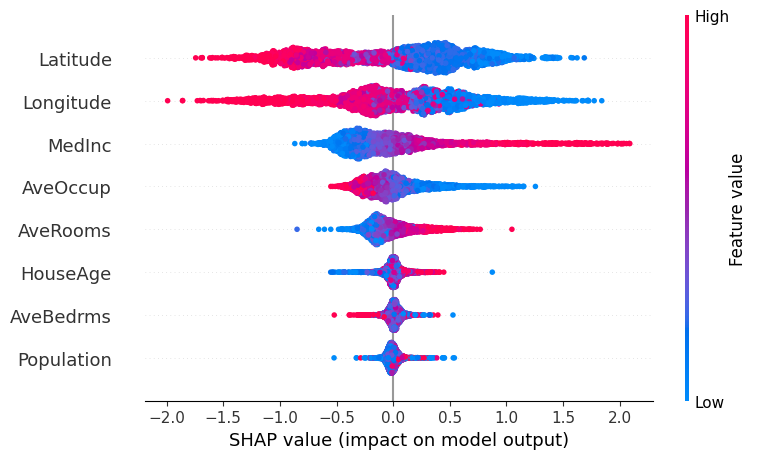

In [ ]:
# Create a summary plot (beeswarm)
shap.summary_plot(shap_values, X_test)

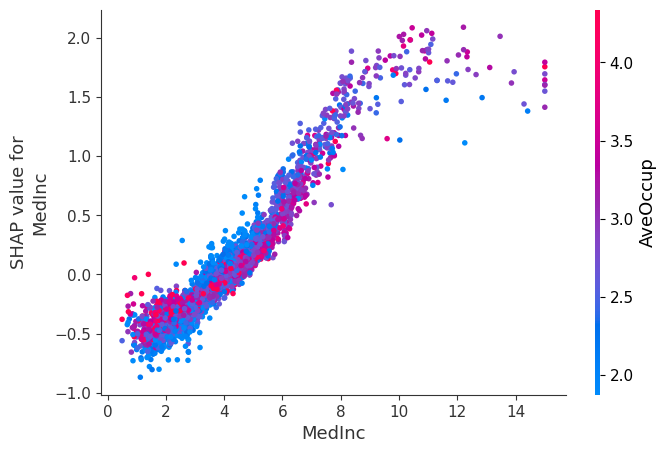

In [ ]:
# Create a dependence plot
shap.dependence_plot("MedInc", shap_values.values, X_test)